In [20]:
import pandas as pd
import numpy as np
import re
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Load Cleaned Data

In [21]:
df = pd.read_csv('/content/drive/MyDrive/target_project/data/clean_reviews.csv')
df.head()

,product,source,categories,date,didPurchase,doRecommend,rating,reviews,title,sentiment,review_length
0,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-13T00:00:00.000Z,NaN,1.0,5.0,This product so far has not disappointed. My c...,brand name,1,27
1,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-13T00:00:00.000Z,NaN,1.0,5.0,great for beginner or experienced person. Boug...,very fast,1,14
2,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-13T00:00:00.000Z,NaN,1.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,1,27
3,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-13T00:00:00.000Z,NaN,1.0,4.0,I've had my XYZ brand HD 8 two weeks now and I...,Good!!!,1,119
4,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-12T00:00:00.000Z,NaN,1.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,1,117


In [22]:
df.shape

(34625, 11)

Combining title and review text

In [23]:
df['title'] = df['title'].fillna('')
df['text'] = df['title'] + ' ' + df['reviews']


Text Cleaning function

In [24]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)


Train-test split

In [25]:
X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


tf-idf vectorization

In [26]:
tfidf = TfidfVectorizer(
    max_features=6000,
    ngram_range=(1, 2),
    min_df=5
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Train logistic regression

In [27]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

Evaluation

In [28]:
y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.35      0.75      0.48       462
           1       0.98      0.90      0.94      6463

    accuracy                           0.89      6925
   macro avg       0.67      0.83      0.71      6925
weighted avg       0.94      0.89      0.91      6925



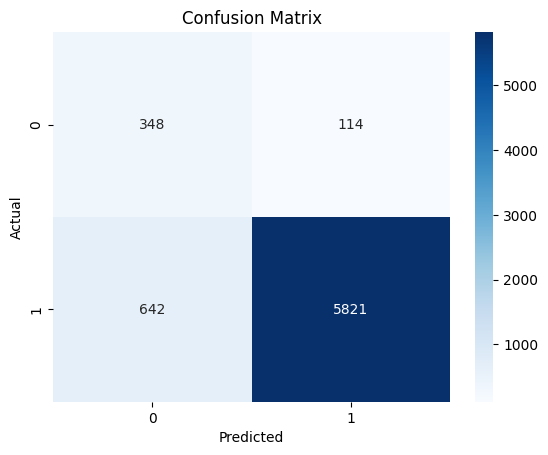

In [29]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Saving model artifacts

In [30]:
import joblib

joblib.dump(model, '/content/model_sentiment.pkl')
joblib.dump(tfidf, '/content/tfidf_vectorizer.pkl')


['/content/tfidf_vectorizer.pkl']